In [1]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom imports
from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.data.valuations_dfs import TeamValues
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.valuations_visual import TeamValsPlots

pd.set_option('display.max_columns', None)

In [2]:
# read in premier league team data
df = gcp.read_df_from_bucket(bucket_name='processed_transfermarkt_db', blob_name='processed_la_liga_team_data.csv')

[03/21/24 18:20:01] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=578241;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=818941;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[03/21/24 18:20:02] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=617023;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=127129;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,131,FC Barcelona,fc-barcelona,32,26.3,17,34.19,1090.00,2017,FC Barcelona - 2017,53.12
1,418,Real Madrid,real-madrid,32,24.5,15,29.85,955.35,2017,Real Madrid - 2017,46.88
2,13,Atlético de Madrid,atletico-madrid,36,25.4,20,19.75,711.15,2017,Atlético de Madrid - 2017,55.56
3,1049,Valencia CF,fc-valencia,30,24.3,14,13.27,398.05,2017,Valencia CF - 2017,46.67
4,368,Sevilla FC,fc-sevilla,33,26.5,20,7.67,253.20,2017,Sevilla FC - 2017,60.61


In [4]:
df.shape

(140, 11)

In [5]:
TeamValues(df).pipeline()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,131,FC Barcelona,fc-barcelona,32,26.3,17,34.19,1090.00,2017,FC Barcelona - 2017,53.12
1,418,Real Madrid,real-madrid,32,24.5,15,29.85,955.35,2017,Real Madrid - 2017,46.88
2,13,Atlético de Madrid,atletico-madrid,36,25.4,20,19.75,711.15,2017,Atlético de Madrid - 2017,55.56
3,1049,Valencia CF,fc-valencia,30,24.3,14,13.27,398.05,2017,Valencia CF - 2017,46.67
4,368,Sevilla FC,fc-sevilla,33,26.5,20,7.67,253.20,2017,Sevilla FC - 2017,60.61
...,...,...,...,...,...,...,...,...,...,...,...
135,16795,Granada CF,fc-granada,27,27.4,10,3.21,86.80,2023,Granada CF - 2023,37.04
136,367,Rayo Vallecano,rayo-vallecano,24,28.8,11,3.08,73.80,2023,Rayo Vallecano - 2023,45.83
137,1108,Deportivo Alavés,deportivo-alaves,24,25.3,9,3.08,73.80,2023,Deportivo Alavés - 2023,37.50
138,472,UD Las Palmas,ud-las-palmas,25,26.3,8,2.82,70.40,2023,UD Las Palmas - 2023,32.00


In [6]:
describe_data(df)


,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
team_id,int64,0,0.0,29,13.00,16795.00,714.00,1845.84,3376.71,24,17.14
squad_size,int64,0,0.0,24,22.00,47.00,35.00,34.46,5.54,0,0.00
squad_avg_age,float64,0,0.0,46,23.60,28.80,25.90,26.01,1.10,0,0.00
squad_foreigners,int64,0,0.0,24,1.00,24.00,13.50,13.08,5.23,0,0.00
average_value_euro_mill,float64,0,0.0,134,1.11,43.25,4.84,7.90,8.15,19,13.57
total_value_euro_mill,float64,0,0.0,137,45.65,1160.00,161.52,266.97,267.86,19,13.57
season,int64,0,0.0,7,2017.00,2023.00,2020.00,2020.00,2.01,0,0.00
foreigner_pct,float64,0,0.0,100,3.03,66.67,38.08,37.96,14.28,0,0.00


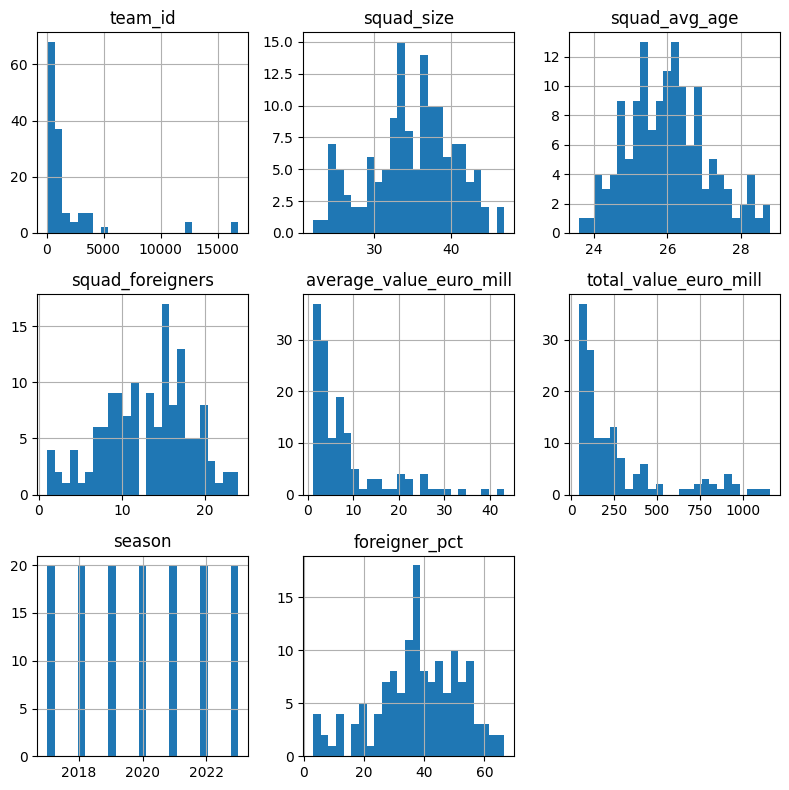

In [7]:
df.hist(bins=25, figsize=(8, 8))
plt.tight_layout()
plt.show()

Statistical plots

In [8]:
stat_plots = StatisticPlots(df)


In [9]:
cols = df.select_dtypes(include='number').columns[1:]


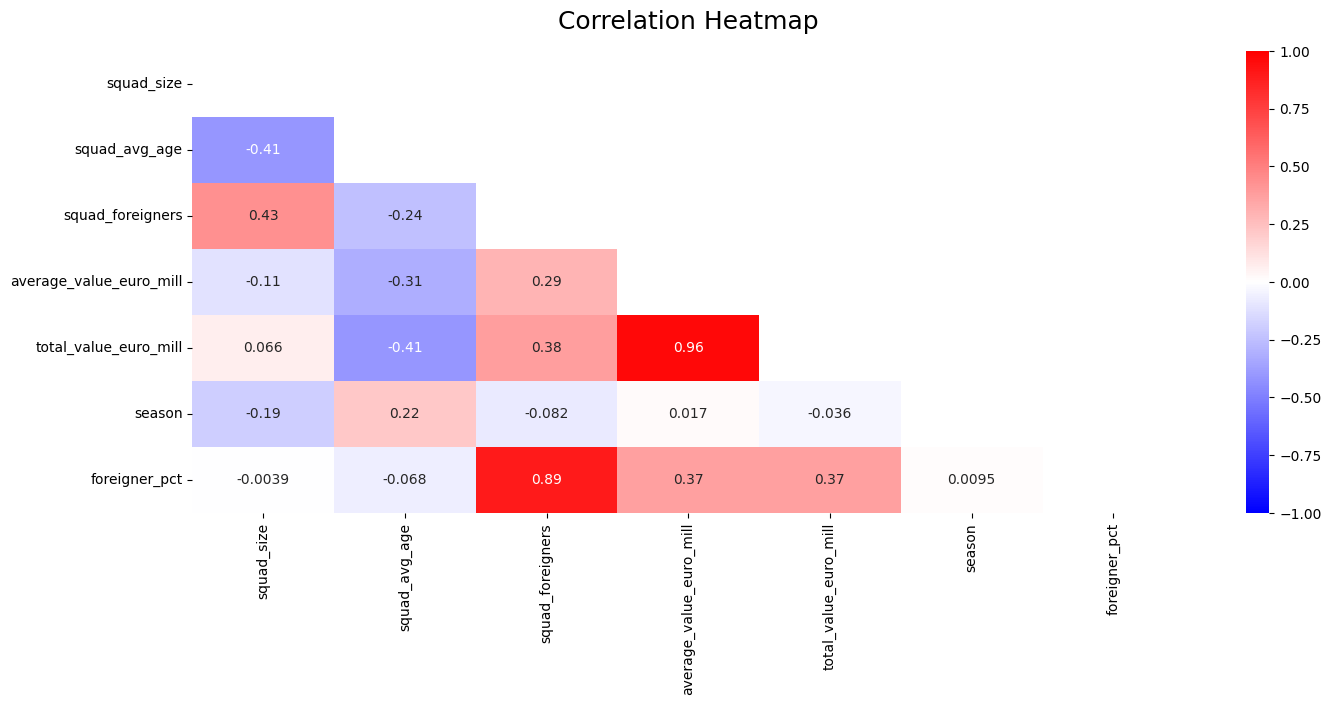

In [10]:
stat_plots.correlation_matrix(vars=cols)


Relationship between total squad value and other variables

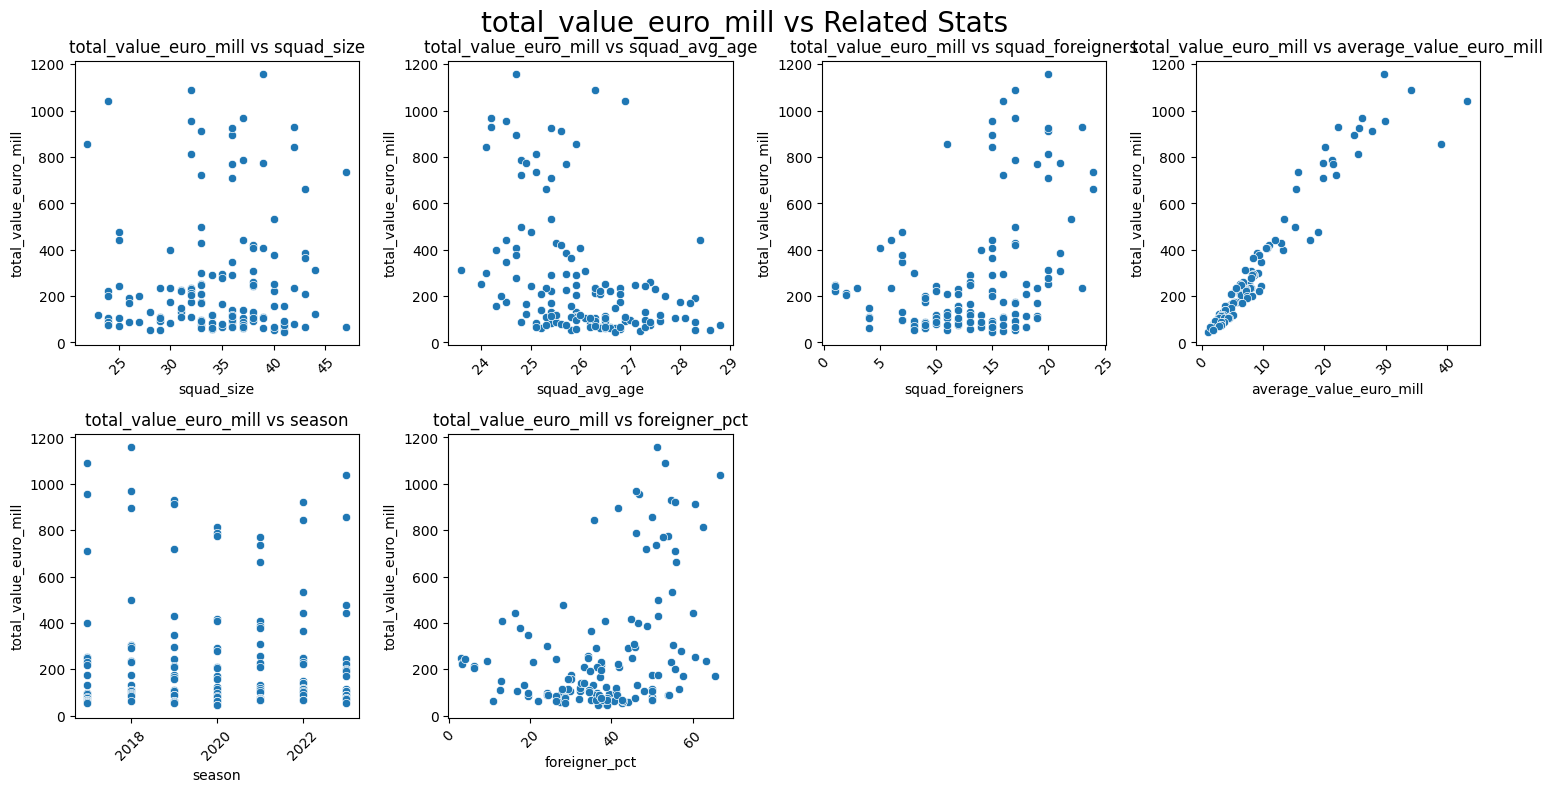

In [11]:
stat_plots.relationships(y='total_value_euro_mill', X=cols)

Relationship between season and each variable

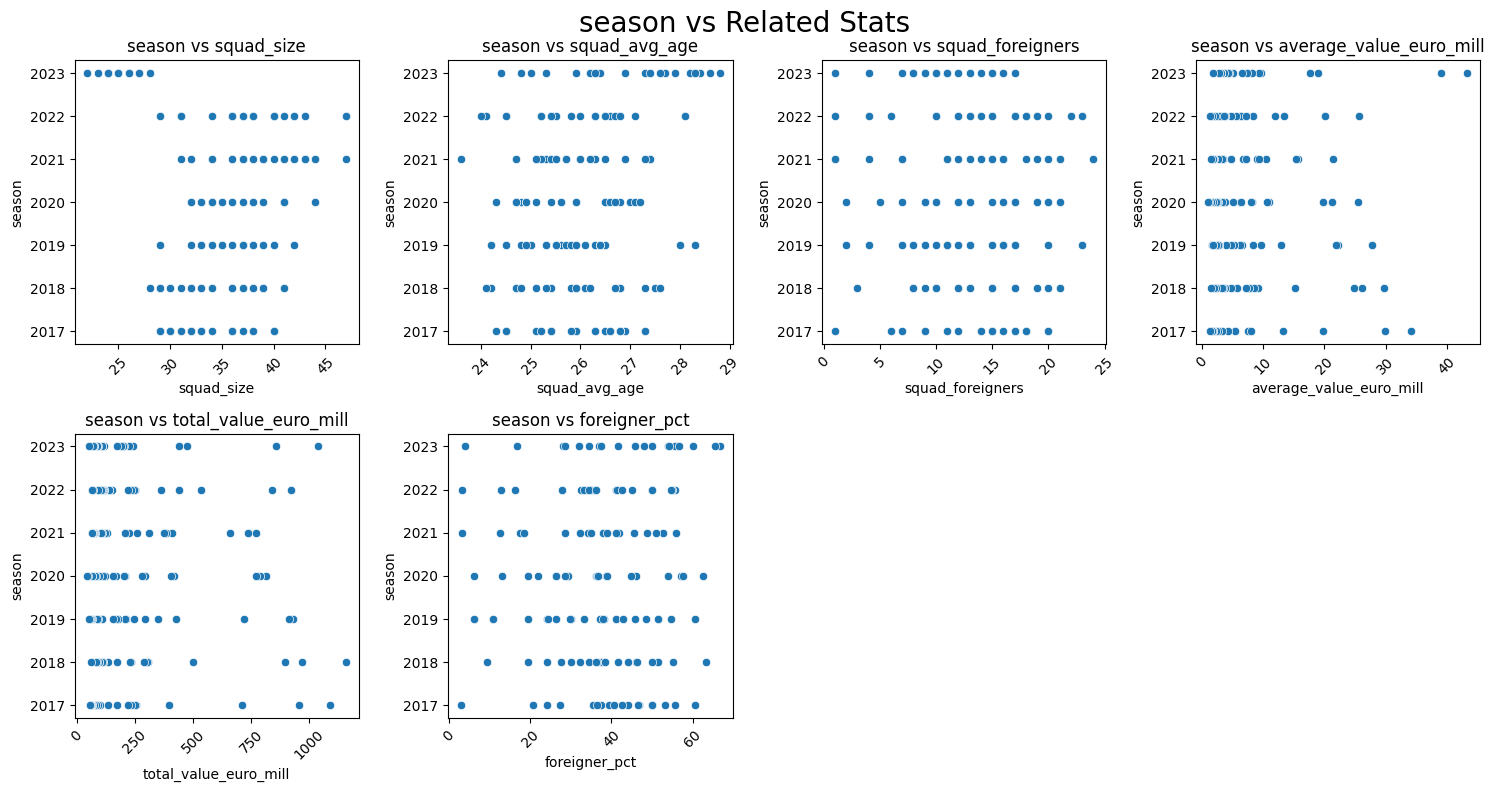

In [12]:
stat_plots.relationships(y='season', X=cols)

In [13]:
plots = TeamValsPlots(df)

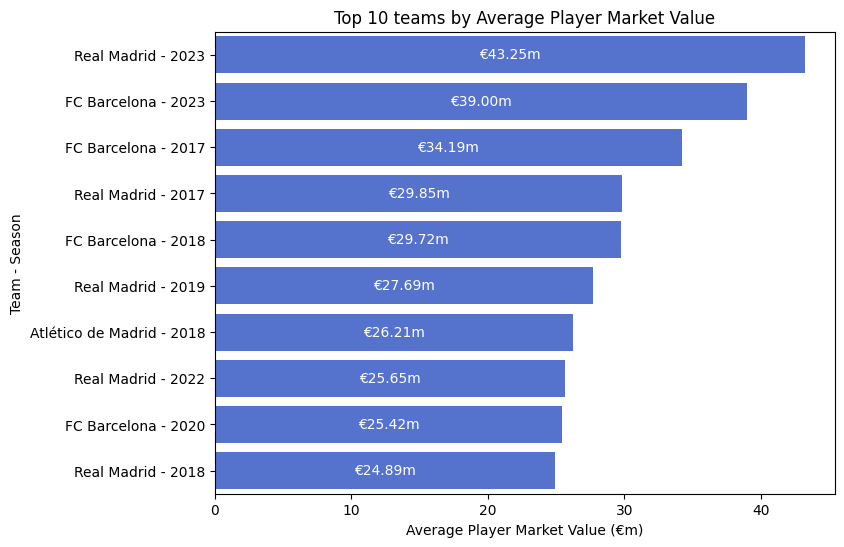

In [14]:
plots.top_10_plot('average_value_euro_mill')
plt.xlabel("Average Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Average Player Market Value")
plt.show()

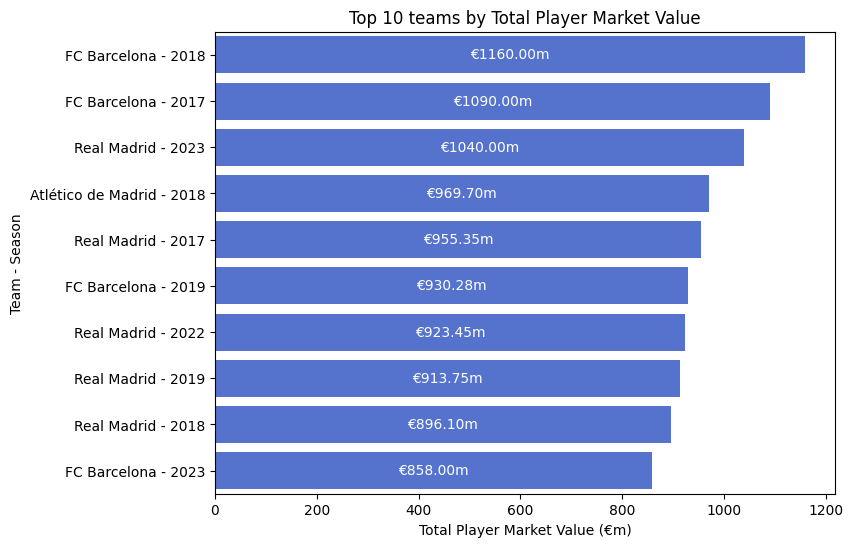

In [15]:
plots.top_10_plot('total_value_euro_mill')
plt.xlabel("Total Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Total Player Market Value")
plt.show()

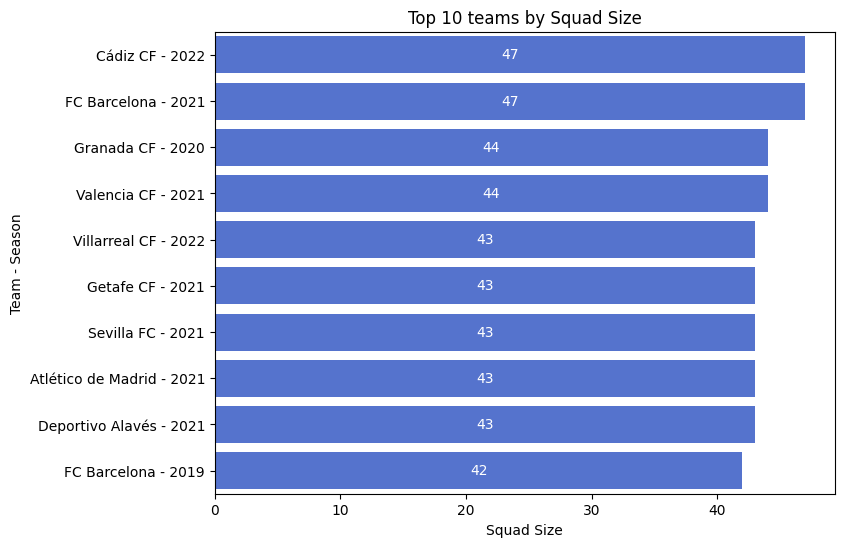

In [16]:
plots.top_10_plot("squad_size")
plt.xlabel("Squad Size")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Squad Size")
plt.show()

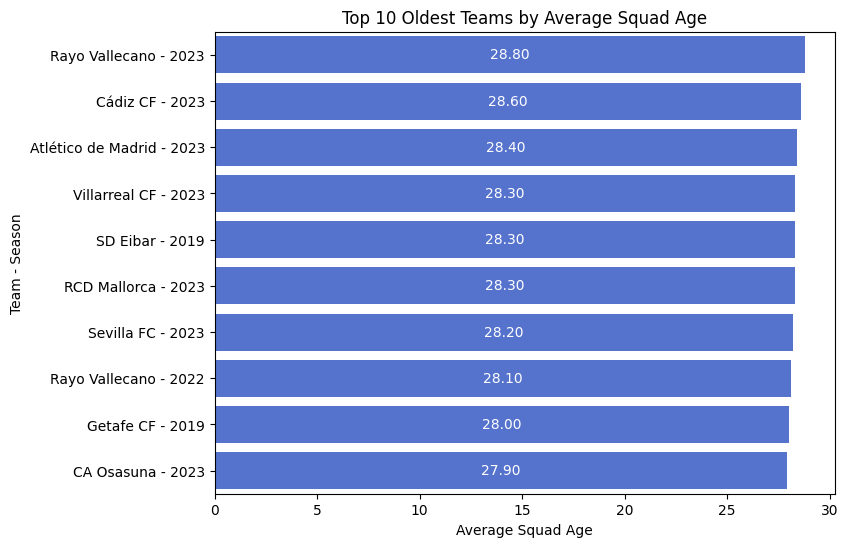

In [17]:
plots.top_10_plot("squad_avg_age")
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Oldest Teams by Average Squad Age")
plt.show()

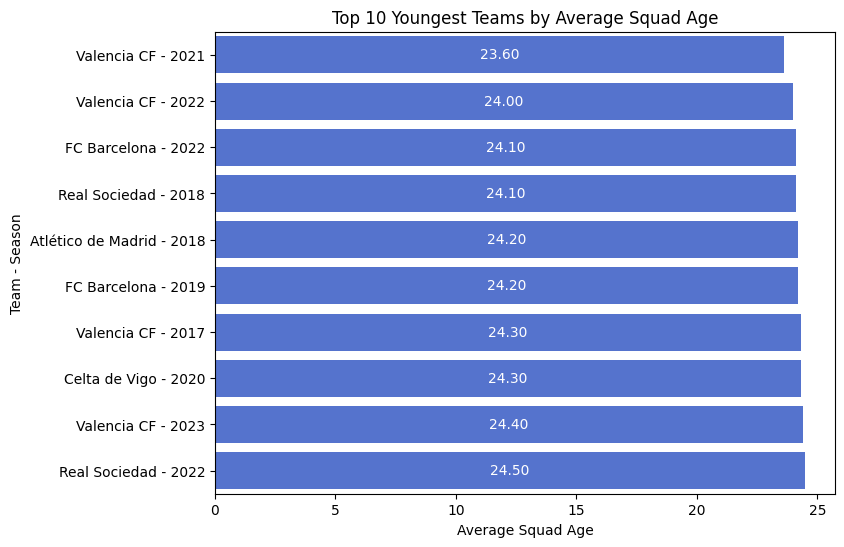

In [18]:
plots.top_10_plot("squad_avg_age", ascend=True)
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Youngest Teams by Average Squad Age")
plt.show()

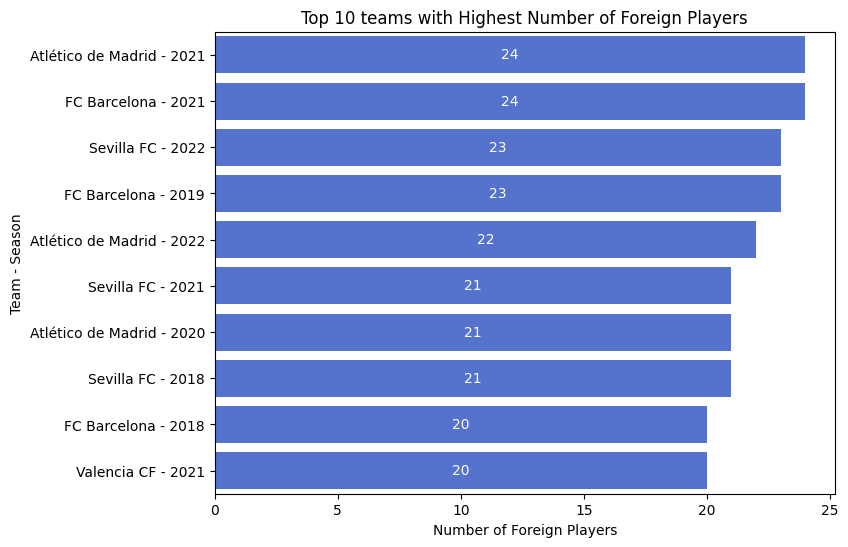

In [19]:
plots.top_10_plot("squad_foreigners")
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Number of Foreign Players")
plt.show()

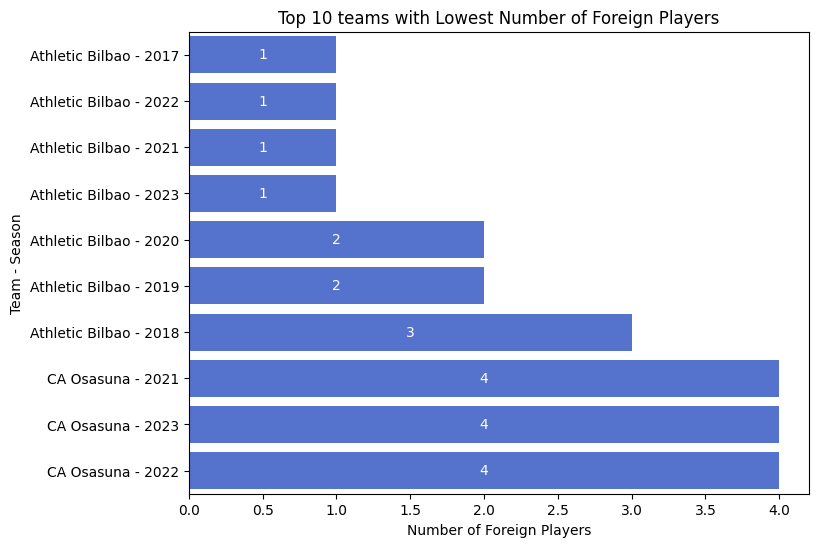

In [20]:
plots.top_10_plot("squad_foreigners", ascend=True)
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Number of Foreign Players")
plt.show()

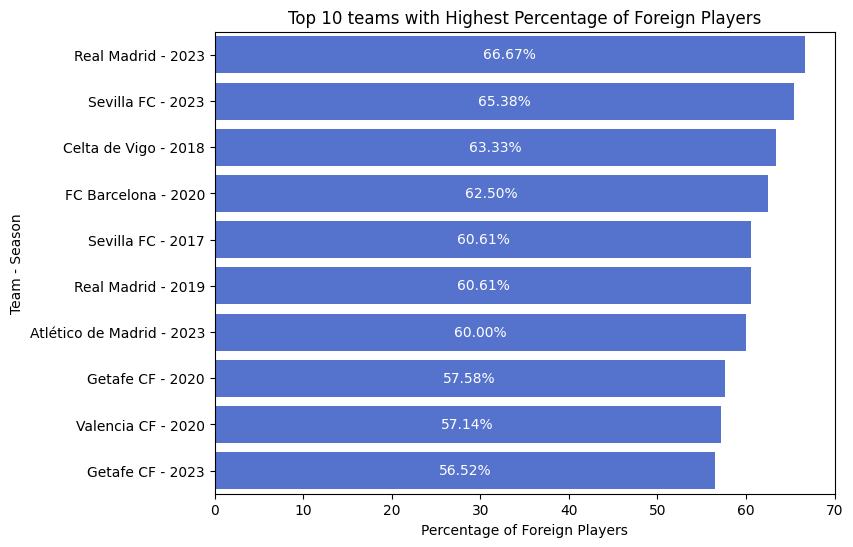

In [21]:
plots.top_10_plot("foreigner_pct")
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Percentage of Foreign Players")
plt.show()

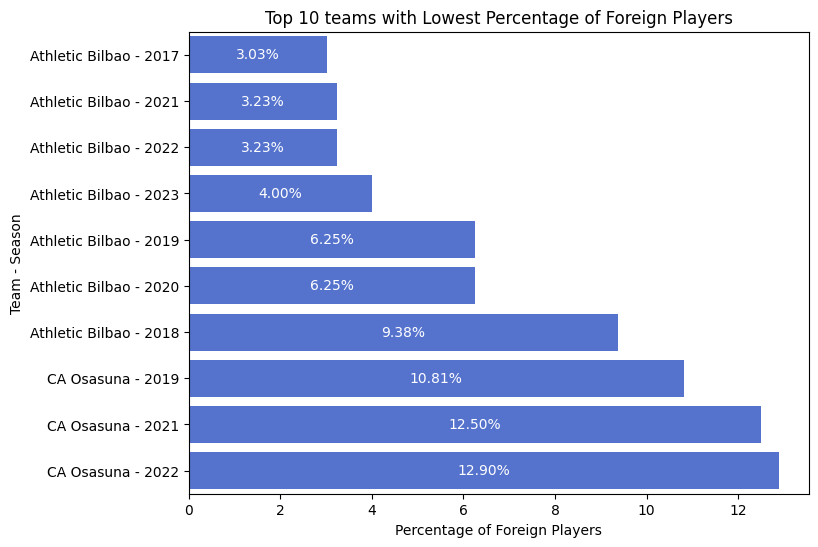

In [22]:
plots.top_10_plot("foreigner_pct", ascend=True)
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Percentage of Foreign Players")
plt.show()

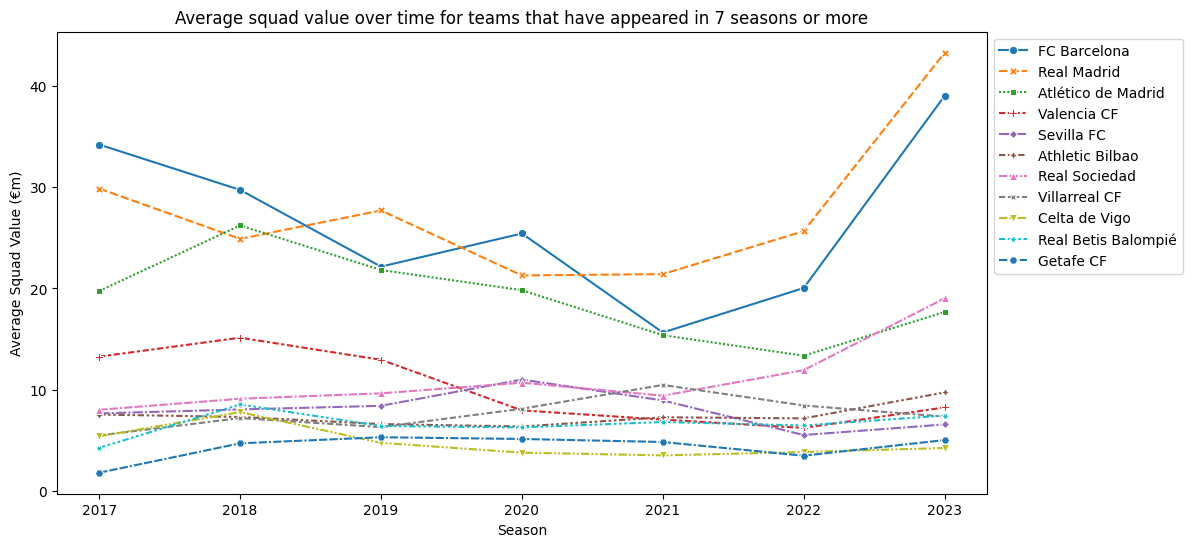

In [23]:
plots.time_series_plot(column='average_value_euro_mill', seasons=7)
plt.show()

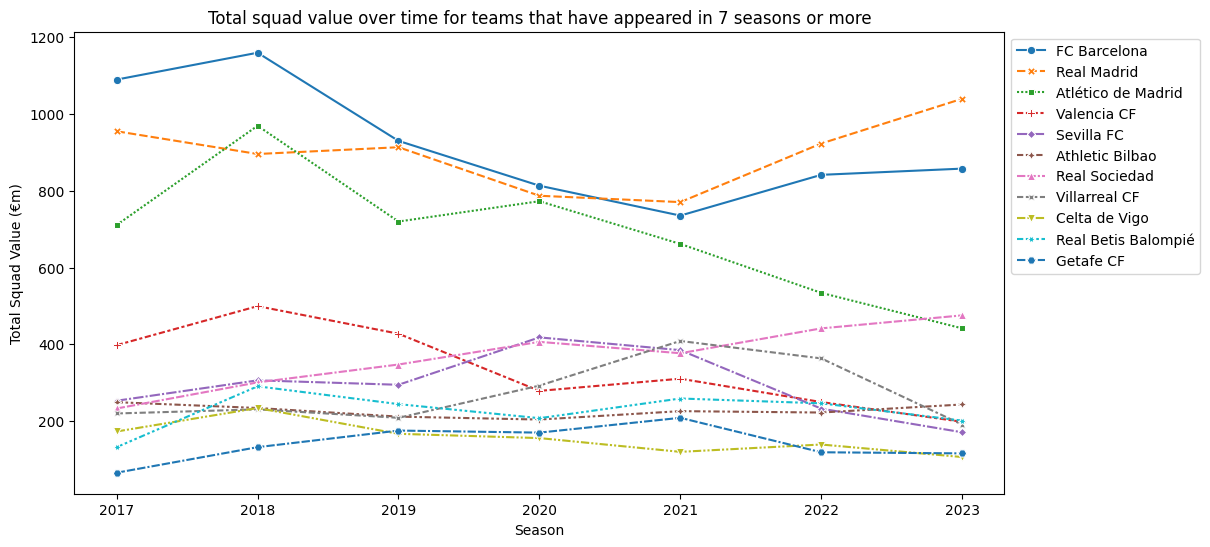

In [24]:
plots.time_series_plot(column='total_value_euro_mill', seasons=7)
plt.show()

In [25]:
data = df.groupby(['season'])['total_value_euro_mill'].mean().reset_index()


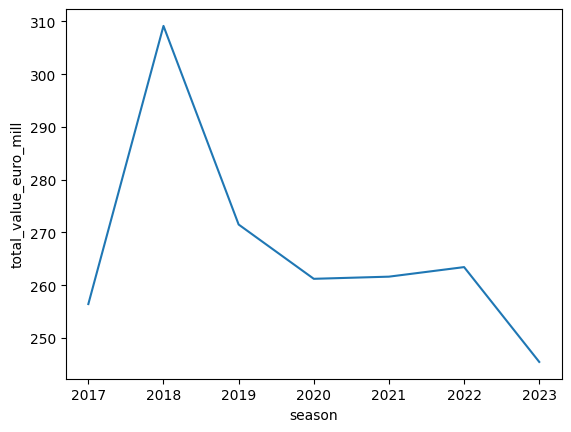

In [26]:
sns.lineplot(data=data, x='season', y='total_value_euro_mill')
plt.show()